Link Dataset : https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d niteshfre/chessman-image-dataset

 95% 55.0M/57.6M [00:03<00:00, 23.2MB/s]
100% 57.6M/57.6M [00:03<00:00, 16.3MB/s]


In [3]:
!unzip /content/chessman-image-dataset.zip -d dataset_directory

Archive:  /content/chessman-image-dataset.zip
  inflating: dataset_directory/Chessman-image-dataset/Chess/Bishop/00000000.JPG  
  inflating: dataset_directory/Chessman-image-dataset/Chess/Bishop/00000001.jpg  
  inflating: dataset_directory/Chessman-image-dataset/Chess/Bishop/00000002.JPG  
  inflating: dataset_directory/Chessman-image-dataset/Chess/Bishop/00000003.png  
  inflating: dataset_directory/Chessman-image-dataset/Chess/Bishop/00000004.jpg  
  inflating: dataset_directory/Chessman-image-dataset/Chess/Bishop/00000006.jpg  
  inflating: dataset_directory/Chessman-image-dataset/Chess/Bishop/00000007.jpg  
  inflating: dataset_directory/Chessman-image-dataset/Chess/Bishop/00000008.jpg  
  inflating: dataset_directory/Chessman-image-dataset/Chess/Bishop/00000009.png  
  inflating: dataset_directory/Chessman-image-dataset/Chess/Bishop/00000010.jpg  
  inflating: dataset_directory/Chessman-image-dataset/Chess/Bishop/00000011.jpg  
  inflating: dataset_directory/Chessman-image-datase

In [4]:
!unzip /content/chessman-image-dataset.zip -d chessman_data

Archive:  /content/chessman-image-dataset.zip
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000000.JPG  
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000001.jpg  
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000002.JPG  
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000003.png  
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000004.jpg  
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000006.jpg  
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000007.jpg  
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000008.jpg  
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000009.png  
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000010.jpg  
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000011.jpg  
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000012.jpg  
  inflating: chess

In [131]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [132]:
path = '/content/chessman_data'

In [133]:
import os

In [134]:
kategori = os.listdir(path)
kategori

['Chessman-image-dataset']

In [135]:
train_dir = '/content/chessman_data/Chessman-image-dataset/Chess'
validation_dir = '/content/chessman_data/Chessman-image-dataset/Chess'
test_dir = '/content/chessman_data/Chessman-image-dataset/Chess'

**ImageDataGenerator untuk memuat serta melakukan augmentasi pada data**

In [136]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [137]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

**Split dataset menjadi train,val dan test**

*   Data Train



In [138]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 551 images belonging to 6 classes.


*   Data Val




In [139]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 551 images belonging to 6 classes.


*   Data Test



In [140]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 551 images belonging to 6 classes.


**sequential model**

In [141]:
model = Sequential()

**pre-trained model VGG16**

In [142]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

**Model compile menggunakan optimizer, loss, metrics**

In [143]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

**Menggunakan Callbacks**

In [144]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

**Train Model**

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
18/18 [==============================] - 15s 724ms/step - loss: 1.9736 - accuracy: 0.3412 - val_loss: 0.9545 - val_accuracy: 0.6770 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - 12s 686ms/step - loss: 1.0609 - accuracy: 0.5953 - val_loss: 0.6449 - val_accuracy: 0.7822 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - 12s 696ms/step - loss: 0.8968 - accuracy: 0.6606 - val_loss: 0.5454 - val_accuracy: 0.8058 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - 13s 672ms/step - loss: 0.7716 - accuracy: 0.7024 - val_loss: 0.4857 - val_accuracy: 0.8240 - lr: 0.0010
Epoch 5/50
18/18 [==============================] - 13s 754ms/step - loss: 0.6952 - accuracy: 0.7423 - val_loss: 0.4731 - val_accuracy: 0.8330 - lr: 0.0010
Epoch 6/50
18/18 [==============================] - 12s 707ms/step - loss: 0.6200 - accuracy: 0.7532 - val_loss: 0.4115 - val_accuracy: 0.8494 - lr: 0.0010
Epoch 7/50
18/18 [==============================] - 13s 752ms/st

**Evaluasi Model**

In [150]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Akurasi test: {test_accuracy:.2f}')

18/18 [==============================] - 5s 273ms/step - loss: 0.0927 - accuracy: 0.9764
Akurasi test: 0.98


**Buat grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation**

In [151]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

**Grafik Akurasi**

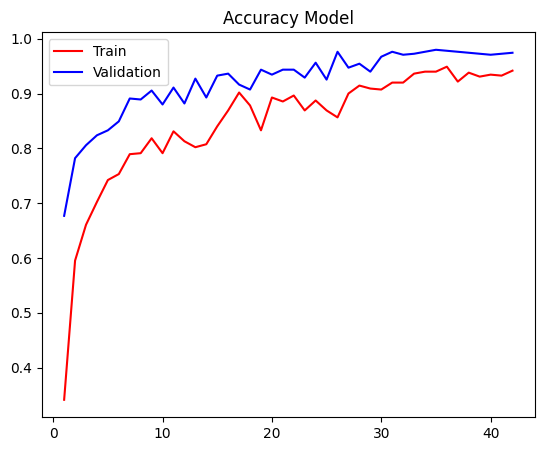

In [152]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'r', label='Train')
plt.plot(epochs, validation_accuracy, 'b', label='Validation')
plt.title('Accuracy Model')
plt.legend()

**Grafik Loss**

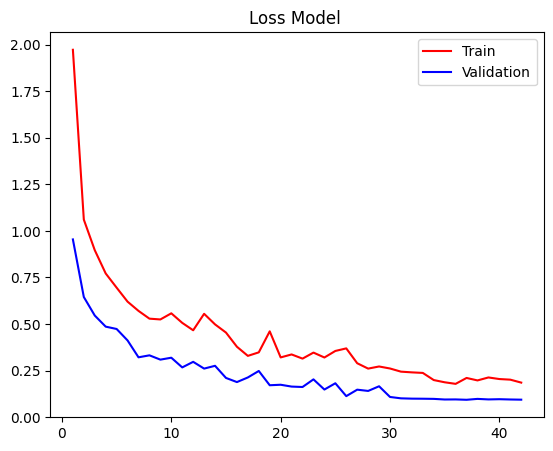

In [153]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, validation_loss, 'b', label='Validation')
plt.title('Loss Model ')
plt.legend()

plt.show()